In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
sns.set(style='whitegrid', palette='muted',font_scale=1.5)
rcParams['figure.figsize'] = 16,10
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix

from funcs import plot_cm

In [2]:
loaded_model = keras.models.load_model('saved_models/model_1')

In [3]:
test = pd.read_csv('testing_sample.csv')
test.set_index('UserID', inplace=True)
test.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
UserID,,,,,,,,,,,,,,,,,,,,,
9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [4]:
x_test, y_test = test.iloc[:,:-1], test.iloc[:,-1:]

In [5]:
from collections import Counter
Counter(y_test['ordered'])

Counter({0: 151655})

Okay so apparently there is NOBODY with a positive label in the test data. Not great, but let's see the model's performation anyway.

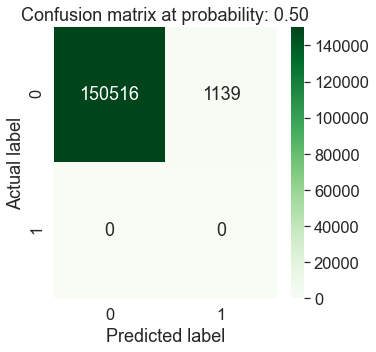

True Negatives:  150516
False Positives:  1139
False Negatives:  0
True Positives:  0
Total predicted purchases:  1139
Model precision:  0.0
Model recall:  nan
Model accuracy:  0.9924895321618147


C:\Users\hartd\Desktop\data_drills\purchase_propensity\funcs.py:65: RuntimeWarning: invalid value encountered in longlong_scalars
  print('Model recall: ', (tp/(tp+fn).round(3)))


In [6]:
plot_cm(loaded_model, x_test, y_test)